# Extracción de datos de archivo .nml
El popular programa para DJing traktor archiva información de las canciones que añadimos a la colección en un archivo con extensión .nml, a primera vista tiene la estructura de un archivo xml. con nodos,etiquetas y atributos. A continuación, en un jupyter notebook con un kernel Python 3, extraeremos la información y manejaremos los datos para poder presentarlos de una manera adecuada. El objetivo es poder crear una web app que nos permita consultar rápidamente este conjunto de datos.

## ENTORNO

In [1]:
import pandas as pd 
import xml.etree.ElementTree as etree

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 10000)

# Cargar la coleccion

In [3]:
tree = etree.parse("collection.nml", etree.XMLParser(encoding='ISO-8859-1'))
root = tree.getroot()

# Estructura del archivo .nml

El archivo está estructurado como un archivo .xml, está compuesto de una serie de nodos, los cuales tienen etiquetas que los definen y attributos.



In [4]:
for i in root:
    print(i)

<Element 'HEAD' at 0x000001E90D2F5900>
<Element 'MUSICFOLDERS' at 0x000001E90D2F5950>
<Element 'COLLECTION' at 0x000001E90D2F59A0>
<Element 'SETS' at 0x000001E913594590>
<Element 'PLAYLISTS' at 0x000001E91359F590>
<Element 'SORTING_ORDER' at 0x000001E913912590>
<Element 'SORTING_ORDER' at 0x000001E913912680>
<Element 'SORTING_ORDER' at 0x000001E913912720>
<Element 'SORTING_ORDER' at 0x000001E9139127C0>
<Element 'SORTING_ORDER' at 0x000001E913912860>
<Element 'SORTING_ORDER' at 0x000001E913912900>
<Element 'SORTING_ORDER' at 0x000001E9139129A0>
<Element 'SORTING_ORDER' at 0x000001E9139129F0>
<Element 'SORTING_ORDER' at 0x000001E913912A40>
<Element 'SORTING_ORDER' at 0x000001E913912A90>
<Element 'SORTING_ORDER' at 0x000001E913912B30>
<Element 'SORTING_ORDER' at 0x000001E913912B80>
<Element 'SORTING_ORDER' at 0x000001E913912BD0>
<Element 'SORTING_ORDER' at 0x000001E913912CC0>
<Element 'SORTING_ORDER' at 0x000001E913912D10>
<Element 'SORTING_ORDER' at 0x000001E913912DB0>


## Elemento COLLECTION
El nodo o elemento que nos interesa es COLLECTION es donde está almacenada 
la información que el programa guarda de cada una de las canciones que componen la colección.


In [5]:
collection = root[2]

## Estructura del elemento ENTRY
El elemento COLLECTION esta formado de elementos ENTRY uno por cancion en nuestra colección.
Cada elemento entry cuenta con un máximo de 8 elementos, podemos llegar a esta conclusión observando el contenido del archivo y a base de ensallo y error al tratar de leer etiquetas y atributos.<br>
En xml.etree podemos usar <b>element.tag</b> para leer las etiquetas y <b>element.attrib</b> para los atributos.



In [6]:
print(str(collection[2404].attrib)+"\n-----------------------|||||||||||------------------------------------------------")
for i in range(0,8):
    print(collection[2404][i].tag)
    print(collection[2404][i].attrib)

{'MODIFIED_DATE': '2009/4/17', 'MODIFIED_TIME': '34028', 'AUDIO_ID': 'AiIAABESMRE0MiIzIjNZeJl2d1mIu7y6qIqrpBEjb////////////////////////////////Z///////////////+bf//////////////+IUyRo///////////////8T////////////////////////////////4////////50REVkIkOf///////////////////////+7///////91MRIRERKENmO3MlRZdVVWd2VXdmZ3eJvv//////////////////////////////////////////////////90V3n////////////////////////8dUQzMiIiMRAAAAAA==', 'TITLE': 'Ghost In The Machine (U-Recken', 'ARTIST': 'Xerox & Illumination'}
-----------------------|||||||||||------------------------------------------------
LOCATION
{'DIR': '/:music/:psychedelik-----------/:FULL ON------------/:Xerox_And_Illumination_-PE/:', 'FILE': '04-xerox_and_illumination_-_ghost_in_the_machine_u-recken_rmx-upe.mp3', 'VOLUME': 'G:', 'VOLUMEID': '14697cae'}
ALBUM
{'TRACK': '4', 'TITLE': 'RMX'}
MODIFICATION_INFO
{'AUTHOR_TYPE': 'user'}
INFO
{'BITRATE': '206000', 'GENRE': 'Psychedelic', 'PLAYTIME': '546', 'PLAYTIME_FLOAT': '545.672', 'RANKING': '255', 'IM

### Función para leer atributos

Una función que aplicaremos contra cada atributo de cada canción.
es importante capturar las excepciones (errores) para que no terminen la ejecución y el programa pueda seguir procesando otros atributos.
Se van a producir estos errores al intentar leer algún atributo o etiqueta ya que no todos los elementos cuentan con todas la etiquetas.



In [7]:
def asigna(elem,att):
    try:
        ppt = elem.attrib[att]
    except:
        ppt = "NONE_"+att
    return ppt
        

In [8]:
counter = 0
details =[]
info = []
row = []
todo = []
for track in collection:  #[0:100]:
    title =  asigna(track,'TITLE')
    artist = asigna(track,'ARTIST')
    details.append(track.attrib.items()) # obtiene un diccionario 
    
    album = "NADA"
    no_track = "NADA"
    key_value = "NADA"
    genre = "NADA"
    import_date ="NADA"
    release_date = "NADA"
    ranking = "NADA"
    playcount = "NADA"
    playtime = "NADA"
    clave = "NADA"
    tempo = "NADA"
    key_value = "NADA"
    
    counter += 1
    for element in track:
        if element.tag == 'LOCATION':
            try:
                directory =  asigna(element,'DIR')
                arch = asigna(element,'FILE')
            except:
                print('nope LOC')
        if element.tag == 'ALBUM':
            try:
                album =  asigna(element,'TITLE')
                no_track = asigna(element,'TRACK')
            except:
                print('nope ALBUM')
        if element.tag == 'INFO':
            try:
                genre = asigna(element,'GENRE')
                import_date = asigna(element,'IMPORT_DATE')
                release_date = asigna(element,'RELEASE_DATE')
                ranking = asigna(element,'RANKING')
                playcount = asigna(element,'PLAYCOUNT')
                playtime = asigna(element,'PLAYTIME')
                clave = asigna(element,'KEY')
            except:
                print('nope INFO')
        if element.tag == 'TEMPO':
            try:
                tempo = asigna(element,'BPM')
            except:
                print('nope TEMPO')
        if element.tag == 'MUSICAL_KEY':
            try:
                key_value = asigna(element,'VALUE')
            except:
                print('nope KEY')
    todo.append((title,artist,directory,arch,album,no_track,genre,import_date,release_date,ranking,playcount,playtime,clave,tempo,key_value))


## Entradas procesadas

In [9]:
counter

16433

In [10]:
todo[1001:1008]

[('Tokyo Tea (Ticon Remix)',
  'FM Radio Gods',
  '/:Users/:CZG/:Music/:Psychedelik/:PSYCHEDELIK/:PROGRESSIVE/:Ticon-I_Love_You_Who_Are_You-2CD-2011/:Ticon-I_Love_You_Who_Are_You-2CD-2011/:',
  '209-fm_radio_gods-tokyo_tea_(ticon_remix)-pillirumpan.mp3',
  'I Love You, Who Are You?',
  '9',
  'Trance',
  '2012/1/6',
  '2011/1/1',
  '255',
  '3',
  '482',
  'Gbm',
  '128',
  '18'),
 ('Who Cares',
  'Phaxe',
  '/:Users/:CZG/:Music/:Psychedelik/:PSYCHEDELIK/:PROGRESSIVE/:VA - Get It (2012)/:',
  '01. Phaxe - Who Cares.mp3',
  'Get It',
  '1',
  'NONE_GENRE',
  '2012/7/15',
  '2012/1/1',
  'NONE_RANKING',
  '13',
  '406',
  'Em',
  '136',
  '16'),
 ('Sexy Dance (Symphonix rmx)',
  'Symphonix',
  '/:Users/:CZG/:Music/:Psychedelik/:PSYCHEDELIK/:PROGRESSIVE/:VA - Get It (2012)/:',
  '02. Symphonix - Sexy Dance (Symphonix rmx).mp3',
  'Get It',
  '2',
  'NONE_GENRE',
  '2012/7/15',
  '2012/1/1',
  'NONE_RANKING',
  '1',
  '418',
  'Am ',
  '135.999',
  '9'),
 ('Paradise',
  'Osher',
  '/:Users

# DATAFRAME

In [11]:
df = pd.DataFrame(todo, columns=["title", "artist","directory","arch","album","no_track","genre","import_date","release_date","ranking","playcount","playtime","key_name","bpm","key"])

In [12]:
df[500:600]

,title,artist,directory,arch,album,no_track,genre,import_date,release_date,ranking,playcount,playtime,key_name,bpm,key
500,Bendamin (Original Mix),Wizzy Noise,/:Users/:CZG/:Music/:Psychedelik/:FULL-ON/:Wizzy_Noise_-_The_Retro_Is_Here_EP_2012/:,01. Wizzy Noise - Bendamin (Original Mix).mp3,The Retro Is Here - Single,1,Psychedelic,2013/12/14,2012/1/1,NONE_RANKING,NONE_PLAYCOUNT,502,Gbm,143.953,18
501,Color Space (Original Mix),Wizzy Noise,/:Users/:CZG/:Music/:Psychedelik/:FULL-ON/:Wizzy_Noise_-_The_Retro_Is_Here_EP_2012/:,02 . Wizzy Noise - Color Space (Original Mix).mp3,The Retro Is Here - Single,2,Psychedelic,2013/12/14,2012/1/1,NONE_RANKING,1,474,Bm,135.997,7
502,Spook (Wizzy Noise Remix),GMS,/:Users/:CZG/:Music/:Psychedelik/:FULL-ON/:Wizzy_Noise_-_The_Retro_Is_Here_EP_2012/:,03. GMS - Spook (Wizzy Noise Remix).mp3,The Retro Is Here - Single,3,Psychedelic,2013/12/14,2012/1/1,NONE_RANKING,NONE_PLAYCOUNT,445,Am,139.998,11
503,sokeism-psychedelic mix-10-12-2010,mixed by Sokeism,/:Users/:CZG/:Music/:Psychedelik/:MIX/:,10-12-2010_320kbps_Sokeism_on_psytrance_clean.mp3,NONE_TITLE,18,Psychedelic,2012/3/29,2010/1/1,NONE_RANKING,NONE_PLAYCOUNT,4085,NONE_KEY,148.004,nada
504,ambipure Rendered,NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:,ambipure Rendered.mp3,NADA,NADA,Other,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,4831,NONE_KEY,190,nada
505,01-Digital Talk vs. Para Halu- Frogs on Lufi,NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:dark/:,01-Digital Talk vs. Para Halu- Frogs on Lufi.mp3,NADA,NADA,NONE_GENRE,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,330,Abm,147.994,20
506,02-Penta- Gone with the wind,NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:dark/:,02-Penta- Gone with the wind.mp3,NADA,NADA,NONE_GENRE,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,305,Gm,147.998,nada
507,03-The Nommos- Magma,NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:dark/:,03-The Nommos- Magma.mp3,NADA,NADA,NONE_GENRE,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,84,Gm,148,nada
508,04-Metalaxys-Noise reduction(poliphonia rmx),NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:dark/:,04-Metalaxys-Noise reduction(poliphonia rmx).mp3,NADA,NADA,NONE_GENRE,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,159,Ebm,147.998,15
509,05-Para Halu-Neverending Story,NONE_ARTIST,/:Users/:CZG/:Music/:Psychedelik/:MIX/:dark/:,05-Para Halu-Neverending Story.mp3,NADA,NADA,NONE_GENRE,2012/3/29,NONE_RELEASE_DATE,NONE_RANKING,NONE_PLAYCOUNT,251,Gm,147.005,nada


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16433 entries, 0 to 16432
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         16433 non-null  object
 1   artist        16433 non-null  object
 2   directory     16433 non-null  object
 3   arch          16433 non-null  object
 4   album         16433 non-null  object
 5   no_track      16433 non-null  object
 6   genre         16433 non-null  object
 7   import_date   16433 non-null  object
 8   release_date  16433 non-null  object
 9   ranking       16433 non-null  object
 10  playcount     16433 non-null  object
 11  playtime      16433 non-null  object
 12  key_name      16433 non-null  object
 13  bpm           16433 non-null  object
 14  key           16433 non-null  object
dtypes: object(15)
memory usage: 1.9+ MB


## Conversión de datos

In [14]:
datanew = df.copy()

In [15]:
#datanew = datanew.loc[df['album'] != "NADA"] #Podemos eliminar entradas con un valor determinado en alguna de las columnas

In [16]:
datanew['bpm'] = pd.to_numeric(datanew['bpm'], errors='coerce').astype('float64')
datanew['key'] = pd.to_numeric(datanew['key'], errors='coerce').astype('float64')

In [17]:
datanew['import_date'] = datanew['import_date'].astype('datetime64[ns]')

In [18]:
datanew['release_date'] = pd.to_datetime(datanew['release_date'],errors='coerce')

In [19]:
datanew['no_track'] = pd.to_numeric(datanew['no_track'], errors='coerce').astype('float64')

In [20]:
datanew['ranking'] = pd.to_numeric(datanew['ranking'], errors='coerce').astype('float64')

In [21]:
datanew['playcount'] = pd.to_numeric(datanew['playcount'], errors='coerce').astype('float64')

In [22]:

datanew['playtime'] = pd.to_numeric(datanew['playtime'], errors='coerce').astype('float64')

In [23]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16433 entries, 0 to 16432
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         16433 non-null  object        
 1   artist        16433 non-null  object        
 2   directory     16433 non-null  object        
 3   arch          16433 non-null  object        
 4   album         16433 non-null  object        
 5   no_track      12962 non-null  float64       
 6   genre         16433 non-null  object        
 7   import_date   16433 non-null  datetime64[ns]
 8   release_date  14571 non-null  datetime64[ns]
 9   ranking       4708 non-null   float64       
 10  playcount     5633 non-null   float64       
 11  playtime      16217 non-null  float64       
 12  key_name      16433 non-null  object        
 13  bpm           15490 non-null  float64       
 14  key           15022 non-null  float64       
dtypes: datetime64[ns](2), float64(6), ob

In [24]:
datanew[100:200]

,title,artist,directory,arch,album,no_track,genre,import_date,release_date,ranking,playcount,playtime,key_name,bpm,key
100,Flute Fruit,Shpongle,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Shpongle_-_Tales_Of_The_Inexpressible-(Retail)-(256kbps)-2001-PsyCZ/:,09-Shpongle_-_Flute_Fruit-PsyCZ.mp3,Tales Of The Inexpressible,9.0,Ambient,2013-12-14,2001-01-01,NaN,NaN,130.0,Em,143.0220,16.0
101,The Sub Genie,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,01 the sub genie.mp3,Perverting Mankind,1.0,Ambient,2013-12-14,2010-01-01,NaN,NaN,392.0,B,124.9990,11.0
102,Solar Seed,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,02 solar seed.mp3,Perverting Mankind,2.0,Ambient,2013-12-14,2010-01-01,NaN,1.0,317.0,Fm,124.9990,22.0
103,Perverting Mankind,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,03 perverting mankind.mp3,Perverting Mankind,3.0,Ambient,2013-12-14,2010-01-01,NaN,1.0,428.0,Gm,110.0000,19.0
104,The Real Triek,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,04 the real triek.mp3,Perverting Mankind,4.0,Ambient,2013-12-14,2010-01-01,NaN,NaN,331.0,Gm,120.0000,10.0
105,West In Pieces,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,05 west in pieces.mp3,Perverting Mankind,5.0,Ambient,2013-12-14,2010-01-01,NaN,NaN,440.0,Gm,140.0000,19.0
106,Bhang Galore,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,06 bhang galore.mp3,Perverting Mankind,6.0,Ambient,2013-12-14,2010-01-01,NaN,NaN,436.0,Dm,85.0001,14.0
107,Countdown To Meltdown (Featuring Atomic Drop),Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,07 countdown to meltdown (featuring atom).mp3,Perverting Mankind,7.0,Ambient,2013-12-14,2010-01-01,NaN,1.0,406.0,Gm,135.0000,19.0
108,One Sure Curative,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,08 one sure curative.mp3,Perverting Mankind,8.0,Ambient,2013-12-14,2010-01-01,NaN,NaN,500.0,Dm,99.9995,14.0
109,Up In Smoke,Slackbaba,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:,09 up in smoke.mp3,Perverting Mankind,9.0,Ambient,2013-12-14,2010-01-01,NaN,2.0,474.0,Em,108.0000,23.0


In [25]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16433 entries, 0 to 16432
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         16433 non-null  object        
 1   artist        16433 non-null  object        
 2   directory     16433 non-null  object        
 3   arch          16433 non-null  object        
 4   album         16433 non-null  object        
 5   no_track      12962 non-null  float64       
 6   genre         16433 non-null  object        
 7   import_date   16433 non-null  datetime64[ns]
 8   release_date  14571 non-null  datetime64[ns]
 9   ranking       4708 non-null   float64       
 10  playcount     5633 non-null   float64       
 11  playtime      16217 non-null  float64       
 12  key_name      16433 non-null  object        
 13  bpm           15490 non-null  float64       
 14  key           15022 non-null  float64       
dtypes: datetime64[ns](2), float64(6), ob

In [26]:
len(df.album.unique())

1451

## Valores null

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

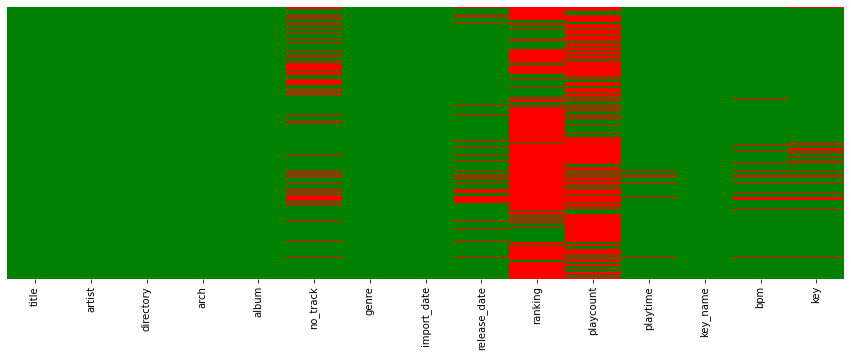

In [28]:
plt.figure(figsize=(15,5),facecolor='#00000000')
sns.heatmap(datanew.isnull(),yticklabels=False,cbar=False,cmap=['green','red']) # 
plt.show()

## Redundancia en los géneros

In [29]:
datanew.genre.unique()

array(['TechHouse', 'Deep House', 'Hip Hop', 'Psychedelic', 'Reggae',
       'Psychill', 'Electronic', 'NONE_GENRE', 'Ambient', 'Amb', 'Goa',
       'Full-On Night', 'Hardcore', 'Psy-Trance', 'Trance', 'Psytrance',
       'Psychedelic Trance', 'Other', 'psychedelic', 'Trip-Hop',
       'Downtempo', 'Ambient / Psy-Ambient', 'Dance', 'Psy Trance',
       'Electronica', 'House',
       'ã\x82¨ã\x83¬ã\x82¯ã\x83\x88ã\x83\xadã\x83\x8bã\x83\x83ã\x82¯ ã\x83\x80ã\x83³ã\x82¹',
       'Progressive Electronic', 'electronic', 'Psychadelic Psychedelic',
       'New Age', 'Darkpsy', 'Psychadelic', 'Psy trance',
       'Psychedelic Psychadelic', 'Blues', 'Lo-Fi', 'Space', 'Techno',
       'psytrance, goa', 'genre', 'Unknown', 'PsyTrance', 'Soundtrack',
       'user defined', 'Rock', 'Classic Rock', 'Easy Listening',
       'Full On',
       'Â\x83GÂ\x83Â\x8cÂ\x83NÂ\x83gÂ\x83Â\x8dÂ\x83jÂ\x83bÂ\x83N (Â\x88Ãª',
       'Industrial', '?', 'Progressive', 'Goa Trance', 'Psy/Goa Trance',
       'Progressive '

In [30]:
len(datanew.genre.unique())

124

Una serie de operaciones para a traves de regex localizar y sustituir algunos generos redundantes.

In [31]:
datanew["genre"].replace({"ã\x82¨ã\x83¬ã\x82¯ã\x83\x88ã\x83\xadã\x83\x8bã\x83\x83ã\x82¯ ã\x83\x80ã\x83³ã\x82¹": "Psychedelik trance"}, inplace=True)

In [32]:
datanew["genre"].replace({"Â\x83GÂ\x83Â\x8cÂ\x83NÂ\x83gÂ\x83Â\x8dÂ\x83jÂ\x83bÂ\x83N (Â\x88Ãª": "Psychedelik trance"}, inplace=True)

In [33]:
datanew["genre"].replace({"Ð¢Ð°Ð½ÑÐµÐ²Ð°Ð»ÑÐ½Ð°Ñ Ð¼ÑÐ·ÑÐºÐ°": "Progressive Psytrance"}, inplace=True)

In [34]:
datanew["genre"].replace(to_replace=r'(Psyche)\w+', value='-Psychedelik', regex=True ,inplace=True)

In [35]:
datanew["genre"].replace(to_replace=r'.*((Psyche)|(Psycha)).*', value='-Psychedelik', regex=True ,inplace=True)

In [36]:
datanew["genre"].replace(to_replace=r'.*(House).*', value='-House', regex=True ,inplace=True)

In [37]:
datanew["genre"].replace(to_replace=r'.*(Hip-Hop|Hip Hop).*', value='-Hip-Hop', regex=True ,inplace=True)

In [38]:
datanew["genre"].replace(to_replace=r'.*(rap|Rap).*', value='-Hip-Hop', regex=True ,inplace=True)

In [39]:
datanew["genre"].replace(to_replace=r'.*(chill |Chill).*', value='-Ambient', regex=True ,inplace=True)

In [40]:
datanew["genre"].replace(to_replace=r'.*(Psychill).*', value='-Ambient', regex=True ,inplace=True)

In [41]:
lista_gg = datanew.genre.unique()

In [42]:
len(sorted(lista_gg))

82

In [43]:
sorted(lista_gg)

['-Ambient',
 '-Hip-Hop',
 '-House',
 '-Psychedelik',
 '?',
 'Acid/IDM/Ambient',
 'Alternativa',
 'Alternative',
 'Amb',
 'Ambient',
 'Ambient / Psy-Ambient',
 'Blues',
 'Boker',
 'Breaks',
 'Classic Rock',
 'Crossover',
 'Dance',
 'Dance/Electronic',
 'Dance; Trance',
 'Darkpsy',
 'Disco',
 'Downtempo',
 'Dub, Downtempo',
 'Easy Listening',
 'Electronic',
 'Electronica',
 'Full On',
 'Full-On Night',
 'Gangsta',
 'Goa',
 'Goa Trance',
 'Goa Trance, Psy Trance',
 'Hardcore',
 'Indie',
 'Industrial',
 'Instrumental',
 'Lo-Fi',
 'NONE_GENRE',
 'New Age',
 'Noise',
 'Other',
 'Podcast',
 'Pop',
 'Progressive',
 'Progressive ',
 'Progressive Electronic',
 'Progressive Psytrance',
 'Progressive Trance',
 'Progressive, Psytrance',
 'Psy Prog',
 'Psy Trance',
 'Psy trance',
 'Psy, Goa Trance',
 'Psy, Goa Trance, Progressive',
 'Psy-Trance',
 'Psy-Trance / Dubstep',
 'Psy-Trance / Dubstep / Electro',
 'Psy-Trance, Progressive Trance',
 'Psy/Goa Trance',
 'PsyTrance',
 'PsyTrance, Progressive T

In [44]:
genre_df = datanew['genre'] == 'Dance; Trance'

In [45]:
datanew.loc[genre_df]

,title,artist,directory,arch,album,no_track,genre,import_date,release_date,ranking,playcount,playtime,key_name,bpm,key
15997,Table Dennis (Extended Mix),Sam Jones,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,01 - Sam Jones - Table Dennis (Extended Mix).mp3,Psytrance 2020 Volume 1,1.0,Dance; Trance,2020-11-21,NaT,NaN,NaN,430.0,NONE_KEY,142.000,14.0
15998,Furthest Reach (Extended Mix),Jirah; Magnus,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,02 - Jirah; Magnus - Furthest Reach (Extended Mix).mp3,Psytrance 2020 Volume 1,2.0,Dance; Trance,2020-11-21,NaT,NaN,2.0,507.0,NONE_KEY,143.000,15.0
15999,Sivam (Extended Mix),Beatman; Ludmilla,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,03 - Beatman; Ludmilla - Sivam (Extended Mix).mp3,Psytrance 2020 Volume 1,3.0,Dance; Trance,2020-11-21,NaT,NaN,NaN,361.0,NONE_KEY,138.001,21.0
16000,Adhana,Vini Vici; Astrix,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,04 - Vini Vici; Astrix - Adhana.mp3,Psytrance 2020 Volume 1,4.0,Dance; Trance,2020-11-21,NaT,NaN,NaN,461.0,NONE_KEY,138.000,4.0
16001,Pandemonium,Eddie Bitar; Psycrain,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,05 - Eddie Bitar; Psycrain - Pandemonium.mp3,Psytrance 2020 Volume 1,5.0,Dance; Trance,2020-11-21,NaT,NaN,NaN,417.0,NONE_KEY,140.000,9.0
16002,Kick Bass Acid Loud (Extended Mix),Simon Patterson,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,06 - Simon Patterson - Kick Bass Acid Loud (Extended Mix).mp3,Psytrance 2020 Volume 1,6.0,Dance; Trance,2020-11-21,NaT,NaN,9.0,446.0,NONE_KEY,138.000,8.0
16003,Amaro,Coming Soon!!!; Katri,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,07 - Coming Soon!!!; Katri - Amaro.mp3,Psytrance 2020 Volume 1,7.0,Dance; Trance,2020-11-21,NaT,NaN,1.0,364.0,NONE_KEY,140.000,3.0
16004,Batavia (Abstract Vision Remix),Kiyoi & Eky,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,08 - Kiyoi & Eky - Batavia (Abstract Vision Remix).mp3,Psytrance 2020 Volume 1,8.0,Dance; Trance,2020-11-21,NaT,NaN,NaN,334.0,NONE_KEY,138.000,14.0
16005,Autobahn (Volcano On Mars Remix),Will Atkinson,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,09 - Will Atkinson - Autobahn (Volcano On Mars Remix).mp3,Psytrance 2020 Volume 1,9.0,Dance; Trance,2020-11-21,NaT,NaN,1.0,228.0,NONE_KEY,143.008,21.0
16006,Rainbow (Extended Mix),Oraw; Cameron Mo,/:music/:psychedelik_new/:VA - Psytrance 2020 Vol.1 (2020) MP3/:,10 - Oraw; Cameron Mo - Rainbow (Extended Mix).mp3,Psytrance 2020 Volume 1,10.0,Dance; Trance,2020-11-21,NaT,NaN,1.0,289.0,NONE_KEY,138.000,22.0


## Round 2

In [46]:
datanew["genre"].replace(to_replace='Psy Prog', value='Progressive Psytrance', regex=True ,inplace=True)

In [47]:
datanew["genre"].replace(to_replace='Full-On Night', value='Full On', regex=True ,inplace=True)

In [48]:
datanew["genre"].replace(to_replace='Psy-Trance, Progressive Trance', value='-Psytrance',inplace=True)

In [49]:
datanew["genre"].replace(to_replace=r'.*(Alternativ).*', value='-Hip-Hop', regex=True ,inplace=True)

In [50]:
datanew["genre"].replace(to_replace=r'.*(Progressive).*', value='-Progressive Psytrance', regex=True ,inplace=True)

In [51]:
datanew["genre"].replace(to_replace=r'.*(Amb).*', value='-Ambient', regex=True ,inplace=True)

In [52]:
datanew["genre"].replace(to_replace=r'.*(Goa).*', value='-Goa Trance', regex=True ,inplace=True)

In [53]:
datanew["genre"].replace(to_replace=r'^(Psy).*', value='-Psytrance', regex=True ,inplace=True)

In [54]:
len(datanew.genre.unique())

56

In [55]:
sorted(datanew.genre.unique())

['-Ambient',
 '-Goa Trance',
 '-Hip-Hop',
 '-House',
 '-Progressive Psytrance',
 '-Psychedelik',
 '-Psytrance',
 '?',
 'Blues',
 'Boker',
 'Breaks',
 'Classic Rock',
 'Crossover',
 'Dance',
 'Dance/Electronic',
 'Dance; Trance',
 'Darkpsy',
 'Disco',
 'Downtempo',
 'Dub, Downtempo',
 'Easy Listening',
 'Electronic',
 'Electronica',
 'Full On',
 'Gangsta',
 'Hardcore',
 'Indie',
 'Industrial',
 'Instrumental',
 'Lo-Fi',
 'NONE_GENRE',
 'New Age',
 'Noise',
 'Other',
 'Podcast',
 'Pop',
 'R&B',
 'Reggae',
 'Rock',
 'Soundtrack',
 'Space',
 'Suburban Noize Records',
 'Tech house',
 'Techno',
 'Tipparade',
 'Trance',
 'Trance, Psy Trance',
 'Trip-Hop',
 'Unknown',
 '[Pop',
 'electronic',
 'genre',
 'pop',
 'psychedelic',
 'psytrance, goa',
 'user defined']

In [56]:
datanew[50:100]

,title,artist,directory,arch,album,no_track,genre,import_date,release_date,ranking,playcount,playtime,key_name,bpm,key
50,Soma (Veda Mix),Entheogenic,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Entheogenic_-_Soma_Veda_Mix-2013/:,Entheogenic - Soma (Veda Mix).mp3,NONE_TITLE,1.0,-Psychedelik,2013-05-29,2013-01-01,NaN,NaN,684.0,Fm,132.9980,17.0
51,J.Viewz-Rivers And Homes,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,01-j.viewz-j.viewz-rivers_and_homes-ilu.mp3,Rivers And Homes,1.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,166.0,G#,77.9914,8.0
52,J.Viewz-Salty Air,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,02-j.viewz-j.viewz-salty_air-ilu.mp3,Rivers And Homes,2.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,256.0,Eb,91.8362,8.0
53,J.Viewz-Wht U Hv For The Sun,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,03-j.viewz-j.viewz-wht_u_hv_for_the_sun-ilu.mp3,Rivers And Homes,3.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,256.0,Cm,86.4871,12.0
54,J.Viewz-Prelude,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,04-j.viewz-j.viewz-prelude-ilu.mp3,Rivers And Homes,4.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,136.0,Am,112.4930,21.0
55,J.Viewz-Oh Something's Quiet,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,05-j.viewz-j.viewz-oh_somethings_quiet-ilu.mp3,Rivers And Homes,5.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,249.0,D,149.9810,21.0
56,J.Viewz-Meantime (Little Notes),J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,06-j.viewz-j.viewz-meantime_(little_notes)-ilu.mp3,Rivers And Homes,6.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,295.0,Gbm,129.9800,18.0
57,J.Viewz-This City Means No Love,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,07-j.viewz-j.viewz-this_city_means_no_love-ilu.mp3,Rivers And Homes,7.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,221.0,Cm,95.9847,12.0
58,J.Viewz-Building A Home,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,08-j.viewz-j.viewz-building_a_home-ilu.mp3,Rivers And Homes,8.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,231.0,C,81.0003,0.0
59,J.Viewz-Far Too Close,J.Viewz,/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:,09-j.viewz-j.viewz-far_too_close-ilu.mp3,Rivers And Homes,9.0,Reggae,2013-12-14,2011-01-01,NaN,NaN,347.0,Am,84.9893,0.0


# Directorios a excluir

In [57]:
len(datanew.directory.unique())

1371

In [58]:
for i in datanew.directory.unique():
    print(i)

/:ProgramData/:Native Instruments/:Traktor 2/:Factory Sounds/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Entheogenic_-_Soma_Veda_Mix-2013/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:J.Viewz-Rivers_And_Homes-2011-iLU/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Kuba-Random_Precision_2012/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Opiuo - Butternut Slap Remixed (2013) [MP3 320 - Stepherd]/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Ott - Mir (2011)/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Shpongle_-_Tales_Of_The_Inexpressible-(Retail)-(256kbps)-2001-PsyCZ/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:Slackbaba - Perverting Mankind (2010)/:
/:Users/:CZG/:Music/:Psychedelik/:AMBIENT/:VA-PAZ-Compiled by Ovnimoon-BR/:
/:Users/:CZG/:Music/:Psychedelik/:DARK/:Fungus Funk - Kremlin Gremlin (2012)/:
/:Users/:CZG/:Music/:Psychedelik/:DARK/:V.A. - Shri Maharaj (Compiled & Mixed by Goa Gil)/:
/:Users/:CZG/:Music/:Psychedelik/:
/:Users/:CZG/:Music/:Psychedelik/:FULL-ON/:
/:Users/:CZG/:Music/

In [59]:
death_list = ['/:Users/:CZG/:Music/:Traktor/:Recordings/:','/:Users/:CZG/:Downloads/:','/:Users/:CZG/:Music/:PODCAST/:',
              '/:Users/:CZG/:Music/:Traktor/:Recordings/:GOA_TRANCE/:','/:Users/:CZG/:Music/:Traktor/:Recordings/:PSY_1/:',
              '/:Users/:CZG/:Music/:Traktor/:Recordings/:REMADE/']

In [60]:
dirs_to_remove = datanew['directory'].isin(death_list)

In [61]:
dirs_to_remove

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [62]:
datanew = datanew.loc[~dirs_to_remove]

In [63]:
len(datanew)

16216

# EXPORT

In [64]:
datanew.to_csv('coll.csv',sep=";")

In [65]:
dataExport = datanew.drop(columns=["directory","arch"])

In [66]:
dataExport.columns

Index(['title', 'artist', 'album', 'no_track', 'genre', 'import_date',
       'release_date', 'ranking', 'playcount', 'playtime', 'key_name', 'bpm',
       'key'],
      dtype='object')

In [67]:
dataExport.to_csv('coll.csv',sep=";")

In [68]:
dataExport.to_json(r'./coll.json')

# FIN